In [34]:
data = read.csv('./data/real_estate_listings_clean.csv')
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
head(data)


,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000,64.00,3,3.57,13505,1971,2,3890.625
2,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000,136.06,4,3.57,10405,1900,5,9517.860
3,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000,120.00,4,3.57,12161,1900,5,6416.667
4,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000,158.00,5,3.57,12103,1956,1,2208.861
5,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990,126.00,4,3.57,12157,1909,3,3928.492
6,https://www.immowelt.de/expose/29e4y5t,na,na,207500,34.02,1,3.57,10715,1898,1,6099.353


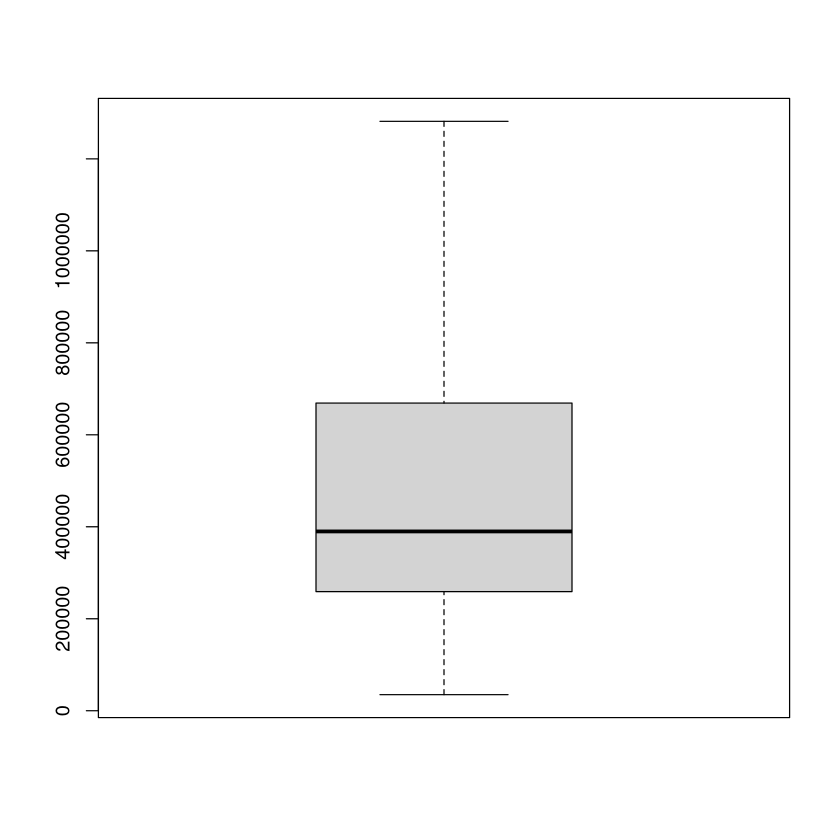

In [3]:
par(bg="white")
boxplot(data$price, outline = FALSE)

In [7]:
par(bg="white")
Q3 = quantile(data$price, 0.75)
Q1 = quantile(data$price, 0.25)
piqr = Q3 - Q1
price_upper = Q3 + piqr * 1.5

cat(price_upper)

Q3 = quantile(data$area, 0.75)
Q1 = quantile(data$area, 0.25)
aiqr = Q3 - Q1
area_upper = Q3 + aiqr * 1.5

cat(area_upper)

1284000

171.395

In [35]:
price_to_area_data = data %>% 
    filter(price <= price_upper & area <= area_upper)

In [ ]:
price_to_area_lm = lm(price ~ poly(area, 2), data = price_to_area_data)
summary(price_to_area_lm)


Call:
lm(formula = price ~ poly(area, 2), data = price_to_area_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-888798 -100424  -19544   70308  755531 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      440044       2293 191.936  < 2e-16 ***
poly(area, 2)1 13240216     154223  85.851  < 2e-16 ***
poly(area, 2)2   648849     154223   4.207 2.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 154200 on 4522 degrees of freedom
Multiple R-squared:  0.6203,	Adjusted R-squared:  0.6202 
F-statistic:  3694 on 2 and 4522 DF,  p-value: < 2.2e-16


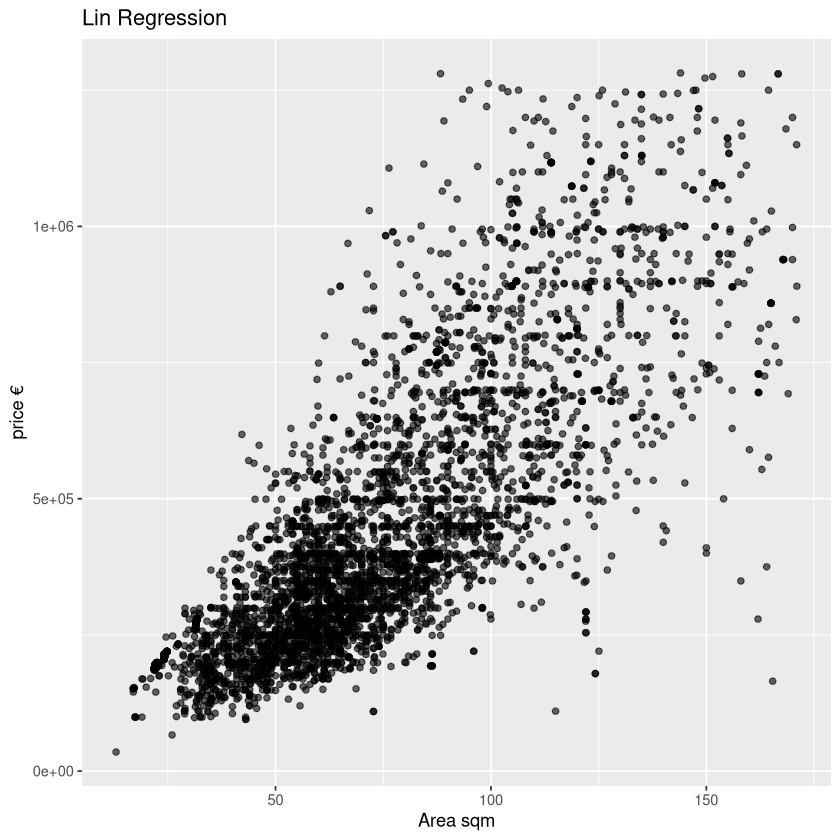

In [55]:
ggplot(price_to_area_data, aes(x = area, y = price)) + 
    geom_point(alpha = 0.6) + 
    labs (
        title = "Lin Regression",
        x = "Area sqm",
        y = "price €"
    )

# Feature Engineering

Binary high price low price

In [61]:
augmented_data = data

low_price_limit = 200000
mid_price_limit = 500000

augmented_data <- augmented_data %>%
    mutate(
        price_cat = if_else(
            price <= low_price_limit,   # 1. Condition for 'low'
            "low",                      # 2. Value if condition 1 is TRUE
            
            # 3. Value if condition 1 is FALSE (Start of the nested if_else)
            if_else(
                price <= mid_price_limit, # 4. Condition for 'mid'
                "mid",                    # 5. Value if condition 4 is TRUE
                "high"                    # 6. Value if condition 4 is FALSE
            )
        )
    )

# View the counts of the new category
table(augmented_data$price_cat)
head(augmented_data)


high  low  mid 
1744  615 2583 

,url,energy,heating,price,area,rooms,fee,zipcode,construction_year,level,price_per_area,price_cat
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,https://www.immowelt.de/expose/29fhx5b,Öl,Zentralheizung,249000,64.00,3,3.57,13505,1971,2,3890.625,mid
2,https://www.immowelt.de/expose/29hzk5u,Gas,"Fußbodenheizung, offener",1295000,136.06,4,3.57,10405,1900,5,9517.860,high
3,https://www.immowelt.de/expose/292m95u,Gas,Etagenheizung,770000,120.00,4,3.57,12161,1900,5,6416.667,high
4,https://www.immowelt.de/expose/29sh55u,Gas,Zentralheizung,349000,158.00,5,3.57,12103,1956,1,2208.861,mid
5,https://www.immowelt.de/expose/29r5y5t,Gas,Etagenheizung,494990,126.00,4,3.57,12157,1909,3,3928.492,mid
6,https://www.immowelt.de/expose/29e4y5t,na,na,207500,34.02,1,3.57,10715,1898,1,6099.353,mid
